<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/tr/tworzenie_modelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 38 images belonging to 3 classes.
Found 29 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 0.2111

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.4243 - loss: 0.1945

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4408 - loss: 0.1889 - val_accuracy: 0.5172 - val_loss: -76.2595
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4720 - loss: -85.5898 - val_accuracy: 0.5172 - val_loss: -165.2151
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4825 - loss: -215.4201 - val_accuracy: 0.5172 - val_loss: -290.4555
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4825 - loss: -352.6915 - val_accuracy: 0.5172 - val_loss: -455.4391
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4825 - loss: -549.3169 - val_accuracy: 0.5172 - val_loss: -667.0673
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4825 - loss: -745.0511 - val_accuracy: 0.5172 - val_loss: -929.7639
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 817ms/step - accuracy: 0.4720 - loss: -1003.9221 - val_accuracy: 0.5172 - val_loss: -1250.4570
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4825 - loss: -1382.2772 - val_accuracy: 0.5172 

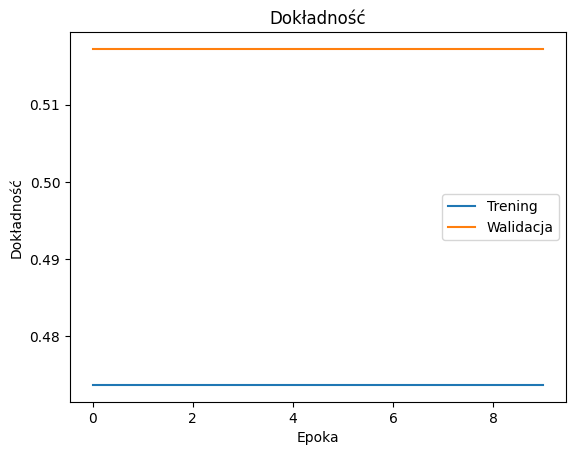

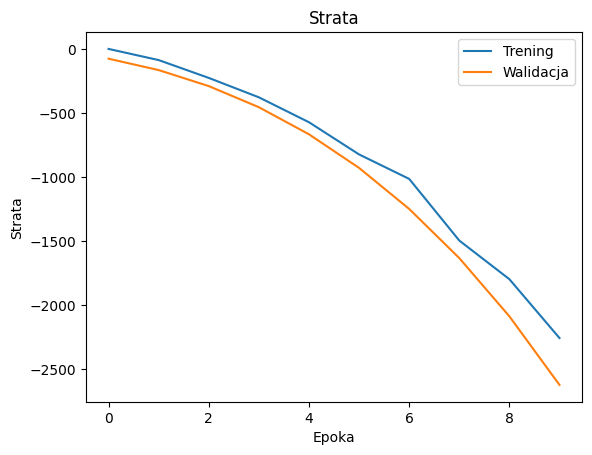

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Ścieżki do danych
train_dir = 'dataset/train'
validation_dir = 'dataset/validation'

# Przygotowanie danych
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trening modelu
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Zapis modelu
model.save('cats_and_dogs_cnn_model.h5')

# Wizualizacja wyników
# Dokładność
plt.plot(history.history['accuracy'], label='Trening')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()


